# Association Rule Mining 

##### What is association rule ?

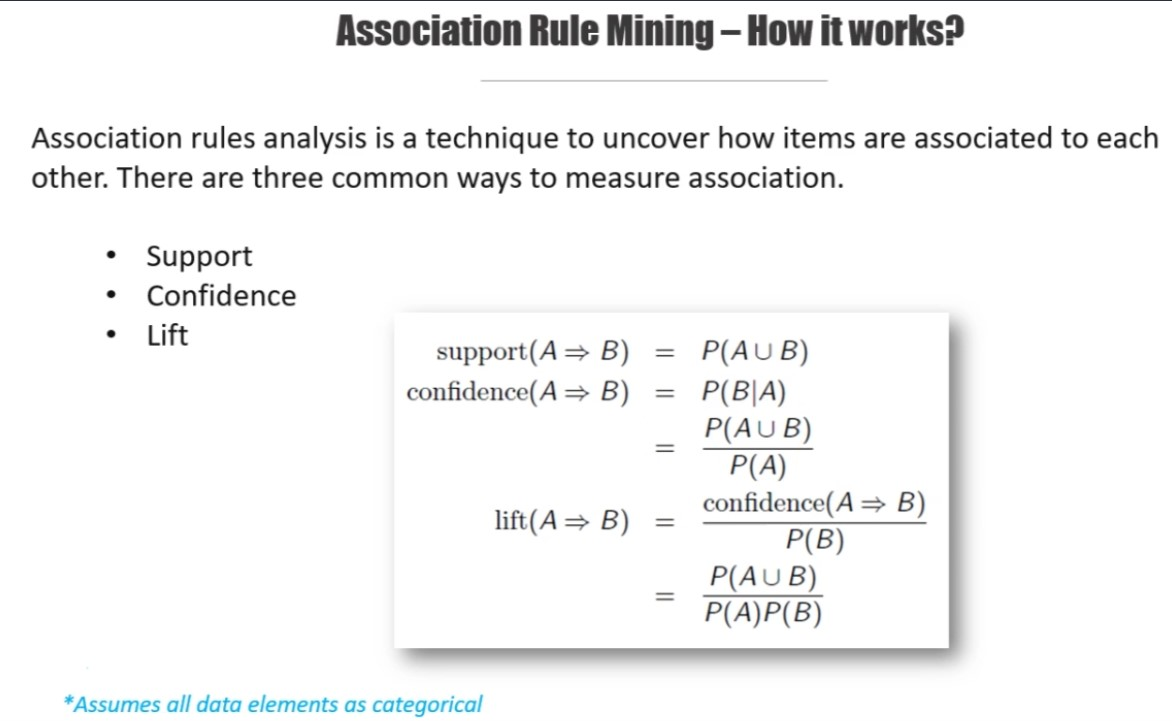

Let's take an example 

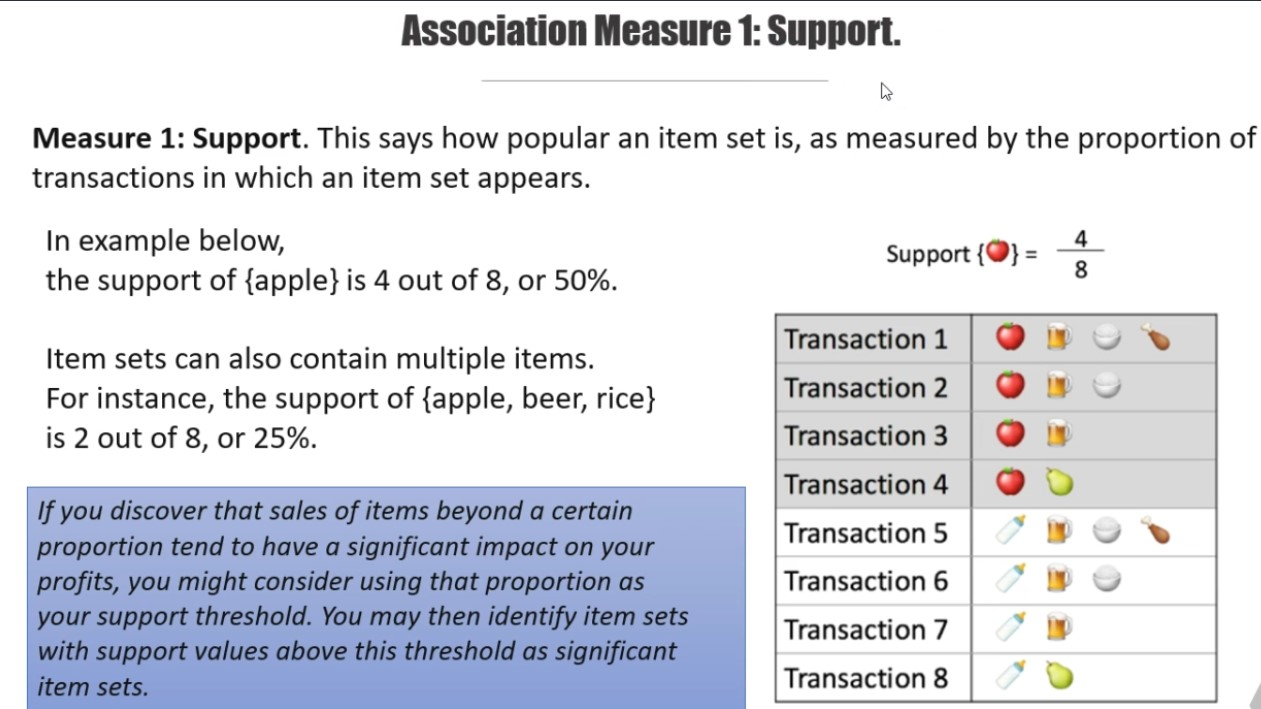

Now Let 's understand the confidence 

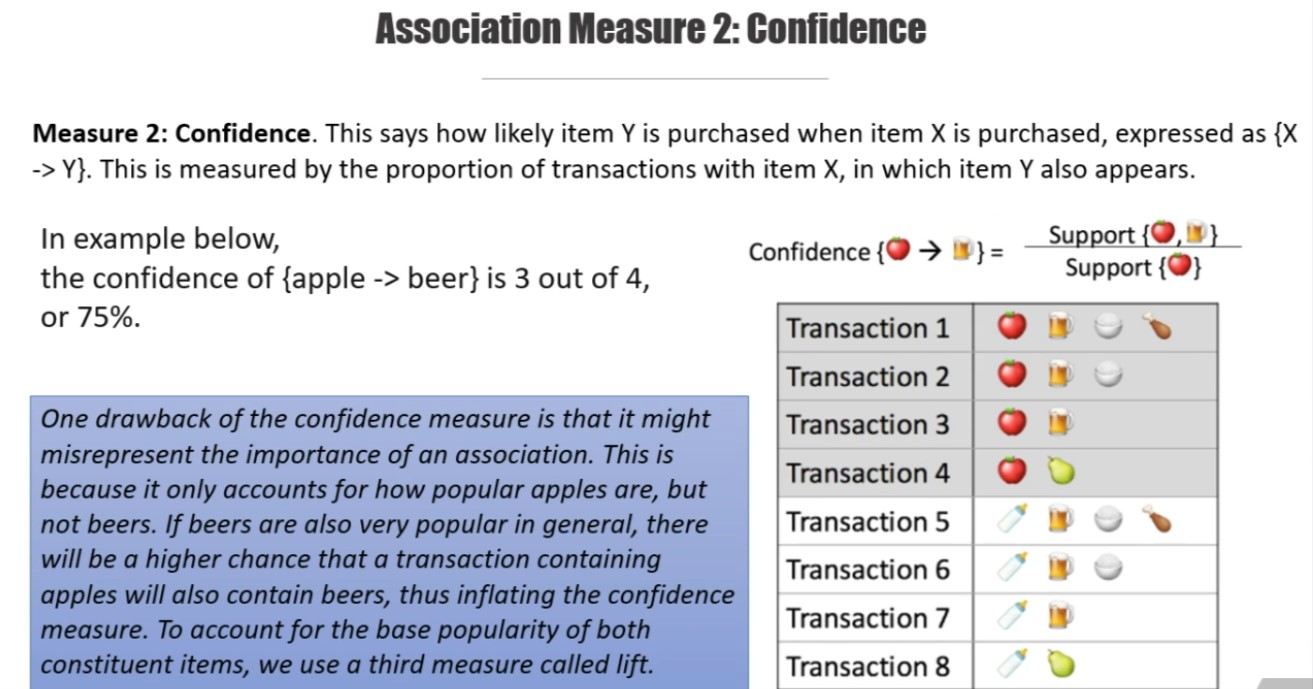

Now Let's' understand the third measure = > Lift

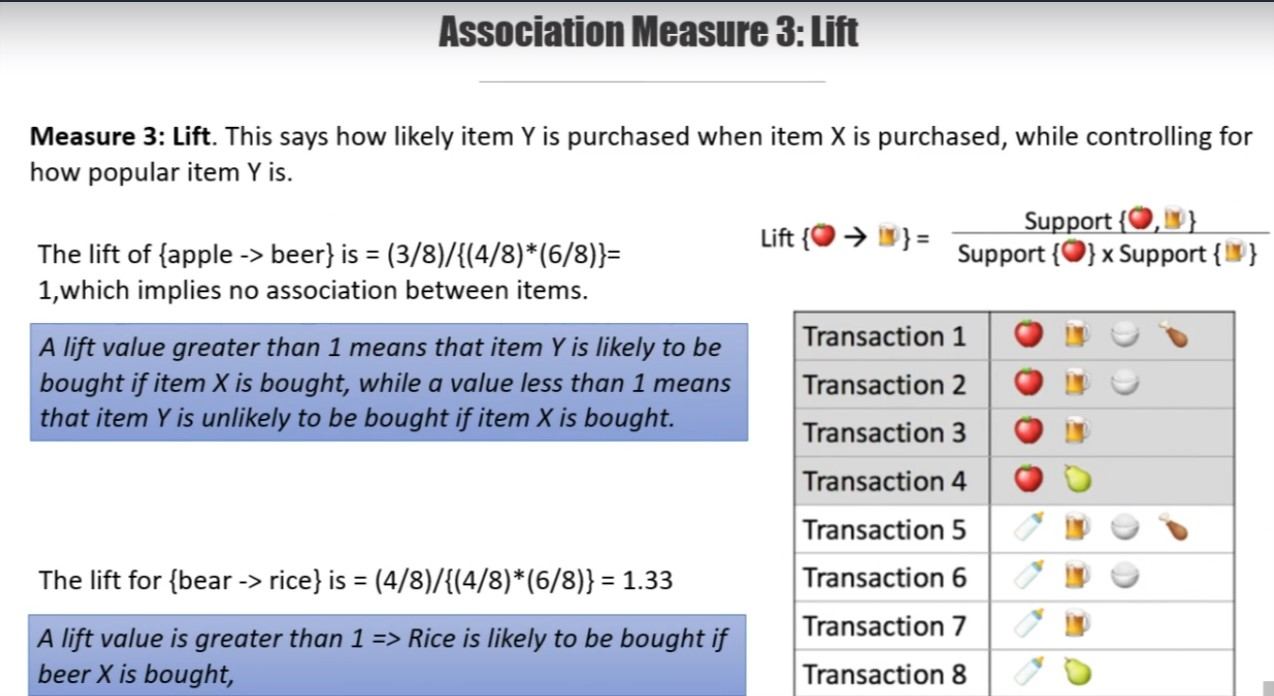

Conclusion :

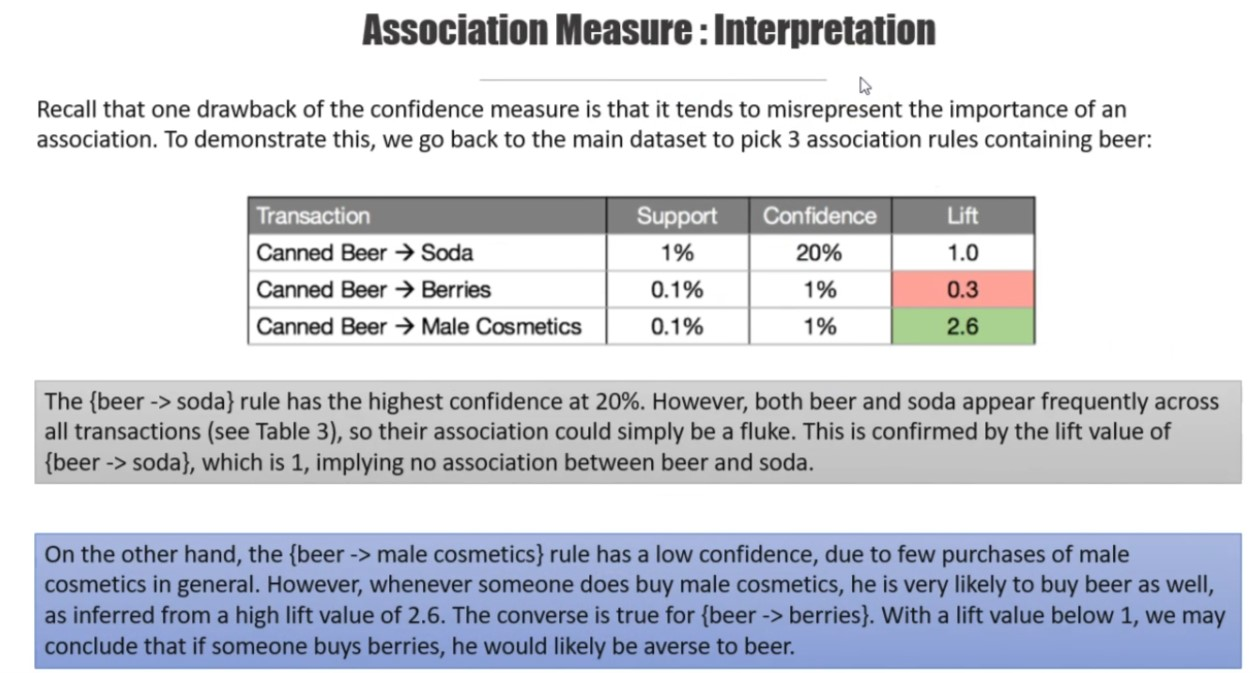

#   Apriori Algorithm 

###### -  Apriori is an algorithm for discovering frequent item set in transaction database ,used in domains such as market basket analysis. 

###### - The input is transaction database .

###### -  and , Transaction database is set of transactions , and each transaction is set of items 

# Implementation in R Programming 

In [2]:
# Install / Load the required packages for Apriori Algo implementation

library(arules)
library(arulesViz)

In [3]:
# Let's Load the transactional dataset 

dataset = read.transactions(file.choose() , sep = ",",rm.duplicates = TRUE)

distribution of transactions with duplicates:
1 
5 


In [4]:
summary(dataset)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

# Observations

-  Density,0.03288973 means 3.2 % are non zero matrix cells





- Matrix has 7501 times 119, i.e. 892619 cells. Hence 7501 times 119 times 0.03288973 , so 29358 items were purchased





- from above output ,we can verify 1788 + 1348 + 1306 + 1282 + 1229 + 22405 = 29358





- mineral water  appeared 1788 times out of 7501 transactions, means 23.84 percent of total transactions having mineral    water 




- Average transaction contained 29358/7501 = 3.91387814958006 items => The mean of 3.914 matches the value we calculated manually.




- A total of 1754 transactions contained only a single item, while one transaction had 20 items 




- The first quartile and median purchase size are 2 and 3 items respectively, implying that 25 percent of transactions contained two or fewer items and about half contained around three items.


In [5]:
sample(itemFrequency(x = dataset,type = 'absolute'),20)

protein bar            shrimp     herb & pepper  whole wheat rice 
              139               536               371               439 
          cookies frozen vegetables           bramble whole wheat pasta 
              603               715                14               221 
      yogurt cake      french fries     strong cheese      dessert wine 
              205              1282                58                33 
     green grapes         bug spray           avocado       light cream 
               68                65               250               117 
             soda              mint         asparagus            turkey 
               47               131                36               469

In [6]:
sample(itemFrequency(x = dataset,type = 'relative'),10)

chocolate bread         bramble       black tea     yogurt cake         avocado 
    0.004266098     0.001866418     0.014264765     0.027329689     0.033328889 
         salmon            milk         chutney      fresh tuna         muffins 
    0.042527663     0.129582722     0.004132782     0.022263698     0.024130116

# Visualize items Frequency plots

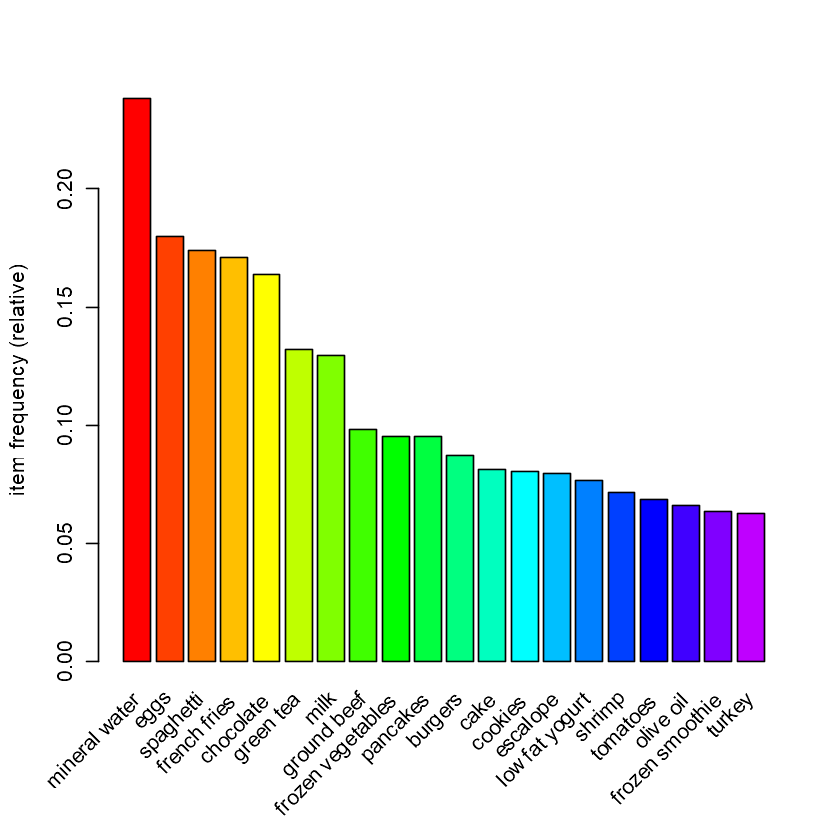

In [85]:
itemFrequencyPlot(x = dataset ,topN = 20,col = rainbow(24))

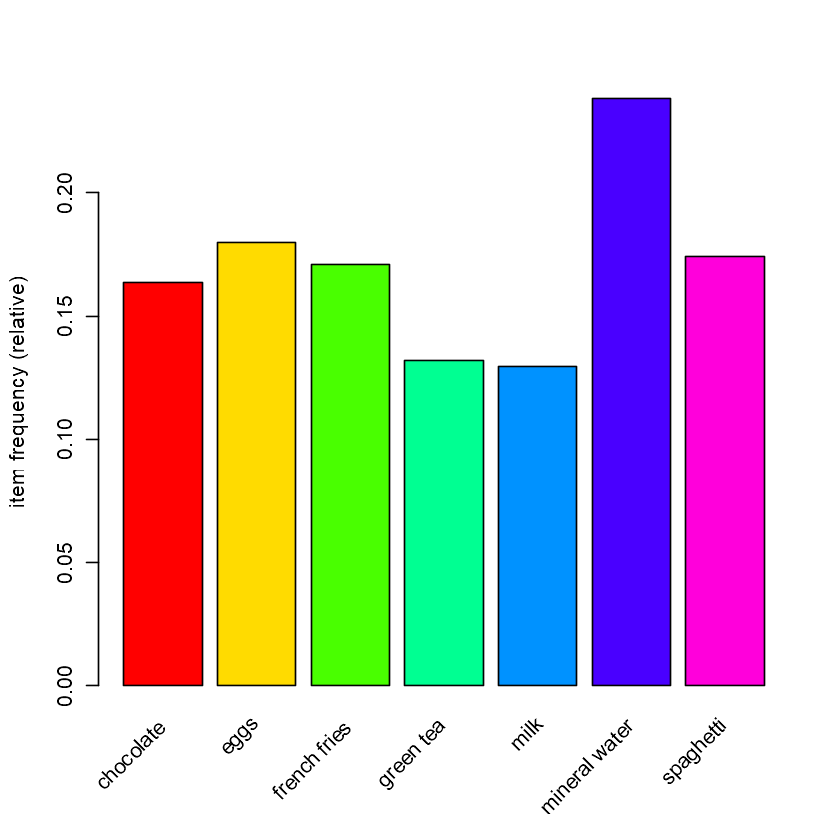

In [83]:
itemFrequencyPlot(x = dataset ,support = 0.1,col = rainbow(7)) # with support value of 0.1 

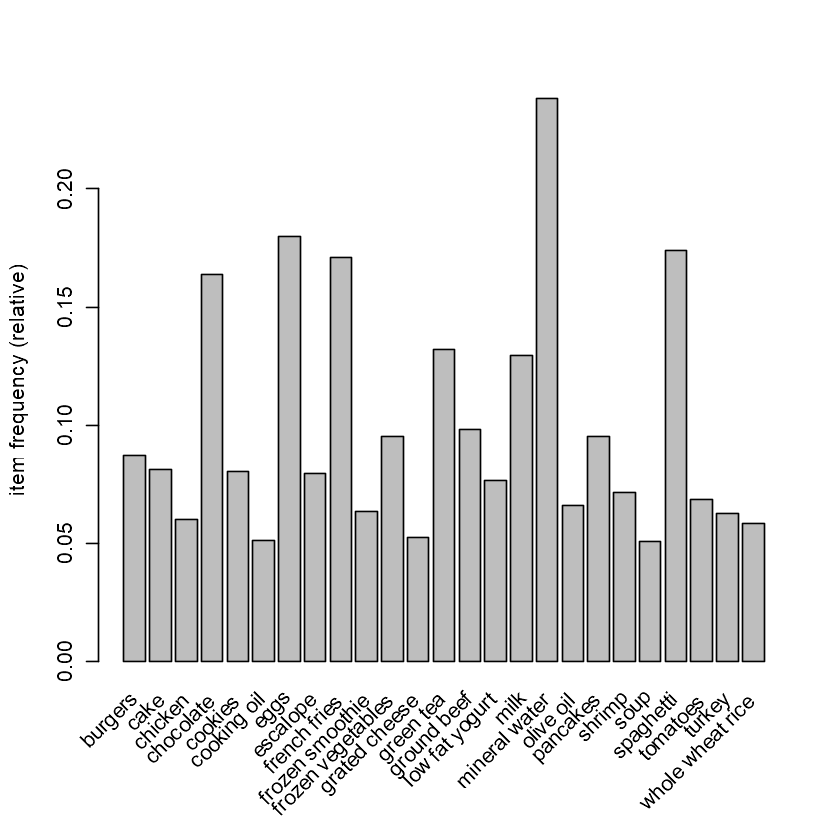

In [15]:
itemFrequencyPlot(x = dataset ,support = 0.05) # with support value of 0.05

# Implementation of Apriori algorithm

In [22]:
# Training Apriori on dataset
# ?apriori

rule_1 <- apriori(data = dataset ,parameter = list(support = 0.1 ,confidence = 0.80))



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 750 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


- With the default of support is 0.1, an item must have appeared atleast 0.1*7501= 750 transactions. Only 7 items   appeared those many times, so no rules were generated


 Support : - 



- To set a support by thinking the minimum number of transactions we would need
- For an example, if an item is purchased three times a day (about 90 times) then it may be worth taking a look at.
- Then support will be 90 out of 7501 transactions, i.e. 0.012



 Confidence : - 




- We will set a confidence threshold of 0.25, which means that in order to be included in the results, the rule has to be correct at least 25 percent of the time.

- This will eliminate the most unreliable rules while allowing some room for us to modify behavior with targeted promotions.


- In addition, We also set minlen = 5 to eliminate rules that contain fewer than five items.

In [24]:
rule_2 <- apriori(data = dataset ,parameter = list(support = 0.012 ,confidence = 0.25))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.012      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [67 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [68 rule(s)] done [0.00s].
creating S4 object  ... done [0.02s].


In [25]:
rule_2

set of 68 rules 

# Evaluating performance

In [26]:
summary(rule_2)

set of 68 rules

rule length distribution (lhs + rhs):sizes
 2  3 
48 20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.294   3.000   3.000 

summary of quality measures:
    support          confidence          lift           count      
 Min.   :0.01253   Min.   :0.2506   Min.   :1.174   Min.   : 94.0  
 1st Qu.:0.01516   1st Qu.:0.2800   1st Qu.:1.469   1st Qu.:113.8  
 Median :0.01706   Median :0.3161   Median :1.642   Median :128.0  
 Mean   :0.02206   Mean   :0.3262   Mean   :1.698   Mean   :165.5  
 3rd Qu.:0.02410   3rd Qu.:0.3601   3rd Qu.:1.820   3rd Qu.:180.8  
 Max.   :0.05973   Max.   :0.4565   Max.   :3.292   Max.   :448.0  

mining info:
    data ntransactions support confidence
 dataset          7501   0.012       0.25

In [32]:
inspect(rule_2[1:35])

     lhs                   rhs             support    confidence lift     count
[1]  {fresh bread}      => {mineral water} 0.01333156 0.3095975  1.298820 100  
[2]  {salmon}           => {spaghetti}     0.01346487 0.3166144  1.818472 101  
[3]  {salmon}           => {mineral water} 0.01706439 0.4012539  1.683336 128  
[4]  {honey}            => {mineral water} 0.01506466 0.3174157  1.331619 113  
[5]  {herb & pepper}    => {ground beef}   0.01599787 0.3234501  3.291994 120  
[6]  {herb & pepper}    => {eggs}          0.01253166 0.2533693  1.409883  94  
[7]  {herb & pepper}    => {spaghetti}     0.01626450 0.3288410  1.888695 122  
[8]  {herb & pepper}    => {mineral water} 0.01706439 0.3450135  1.447397 128  
[9]  {grated cheese}    => {spaghetti}     0.01653113 0.3155216  1.812196 124  
[10] {grated cheese}    => {mineral water} 0.01746434 0.3333333  1.398397 131  
[11] {soup}             => {milk}          0.01519797 0.3007916  2.321232 114  
[12] {soup}             => {spaghetti}  

In [34]:
inspect(sort(rule_2, by = "lift")[1:10])

     lhs                            rhs           support    confidence
[1]  {herb & pepper}             => {ground beef} 0.01599787 0.3234501 
[2]  {mineral water,spaghetti}   => {ground beef} 0.01706439 0.2857143 
[3]  {ground beef,mineral water} => {spaghetti}   0.01706439 0.4169381 
[4]  {soup}                      => {milk}        0.01519797 0.3007916 
[5]  {ground beef}               => {spaghetti}   0.03919477 0.3989145 
[6]  {chocolate,mineral water}   => {milk}        0.01399813 0.2658228 
[7]  {mineral water,spaghetti}   => {milk}        0.01573124 0.2633929 
[8]  {olive oil}                 => {spaghetti}   0.02293028 0.3481781 
[9]  {olive oil}                 => {milk}        0.01706439 0.2591093 
[10] {eggs,mineral water}        => {milk}        0.01306492 0.2565445 
     lift     count
[1]  3.291994 120  
[2]  2.907928 128  
[3]  2.394681 128  
[4]  2.321232 114  
[5]  2.291162 294  
[6]  2.051375 105  
[7]  2.032623 118  
[8]  1.999758 172  
[9]  1.999567 128  
[10] 1.9

The first rule, with a lift of 3.291994, implies that people who buy herb/pepper are nearly three times more likely to buy ground beef than the typical customer

# Subset of association rules

In [39]:
water = subset(rule_2, items %in% c("mineral water","milk"))
inspect(sort(water, by = "lift")[1:10])

     lhs                            rhs             support    confidence
[1]  {mineral water,spaghetti}   => {ground beef}   0.01706439 0.2857143 
[2]  {ground beef,mineral water} => {spaghetti}     0.01706439 0.4169381 
[3]  {soup}                      => {milk}          0.01519797 0.3007916 
[4]  {chocolate,mineral water}   => {milk}          0.01399813 0.2658228 
[5]  {mineral water,spaghetti}   => {milk}          0.01573124 0.2633929 
[6]  {olive oil}                 => {milk}          0.01706439 0.2591093 
[7]  {eggs,mineral water}        => {milk}          0.01306492 0.2565445 
[8]  {soup}                      => {mineral water} 0.02306359 0.4564644 
[9]  {milk,mineral water}        => {spaghetti}     0.01573124 0.3277778 
[10] {milk,spaghetti}            => {mineral water} 0.01573124 0.4436090 
     lift     count
[1]  2.907928 128  
[2]  2.394681 128  
[3]  2.321232 114  
[4]  2.051375 105  
[5]  2.032623 118  
[6]  1.999567 128  
[7]  1.979774  98  
[8]  1.914955 173  
[9]  1

- The subset() function can be used with several keywords and operators:


- The keyword items, matches an item appearing anywhere in the rule.



- Limit the subset with lhs and rhs instead.



- The operator %in% means that at least one of the items must be found in the list you defined.



- For partial matching (%pin%) and complete matching (%ain%).



- We can also filter by support, confidence, or lift.



- We can also combine standard R logical operators such as and (&), or (|), and not (!).

# Association rules  Plot

#### Scatter Plot  : --

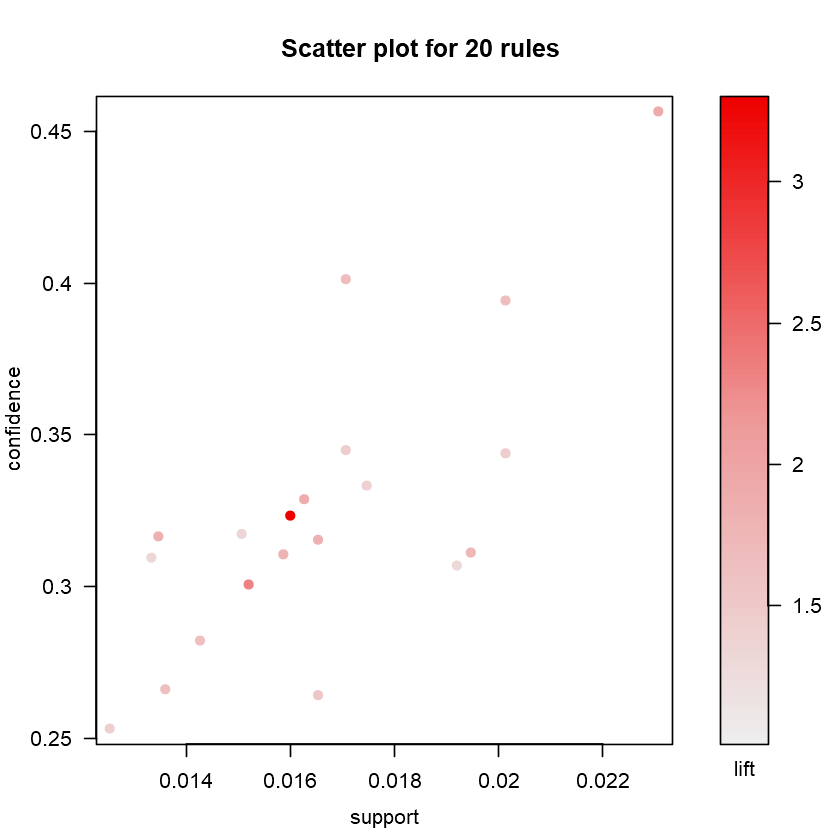

In [74]:
plot(rule_2[1:20])

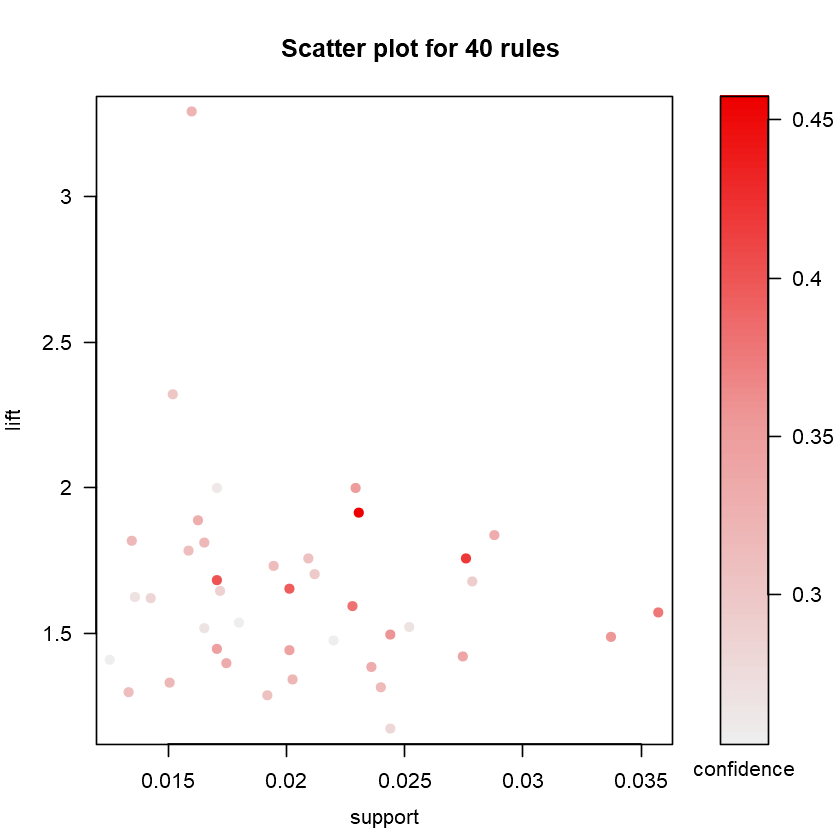

In [75]:
plot(rule_2[1:40] , measure=c("support", "lift"), shading="confidence")

Itemsets in Antecedent (LHS)
 [1] "{mineral water,spaghetti}"   "{ground beef,mineral water}"
 [3] "{soup}"                      "{chocolate,mineral water}"  
 [5] "{eggs,mineral water}"        "{olive oil}"                
 [7] "{milk,spaghetti}"            "{chocolate,milk}"           
 [9] "{ground beef,spaghetti}"     "{eggs,milk}"                
[11] "{ground beef}"               "{milk,mineral water}"       
[13] "{salmon}"                    "{cooking oil}"              
[15] "{chicken}"                   "{frozen vegetables}"        
[17] "{milk}"                      "{tomatoes}"                 
[19] "{pancakes}"                  "{herb & pepper}"            
[21] "{whole wheat rice}"          "{spaghetti}"                
[23] "{mineral water}"             "{cake}"                     
[25] "{grated cheese}"             "{shrimp}"                   
[27] "{chocolate}"                 "{frozen smoothie}"          
[29] "{honey}"                     "{low fat yogurt}"        

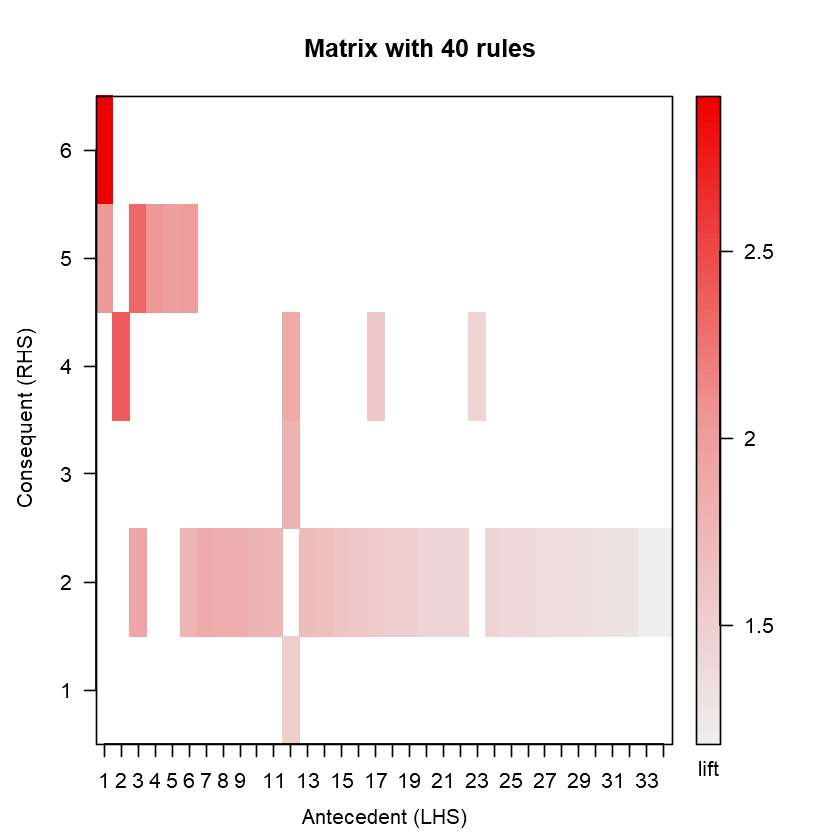

In [78]:
plot(water[1:40], method="matrix", measure="lift")

# Grouped Matrix based visualization

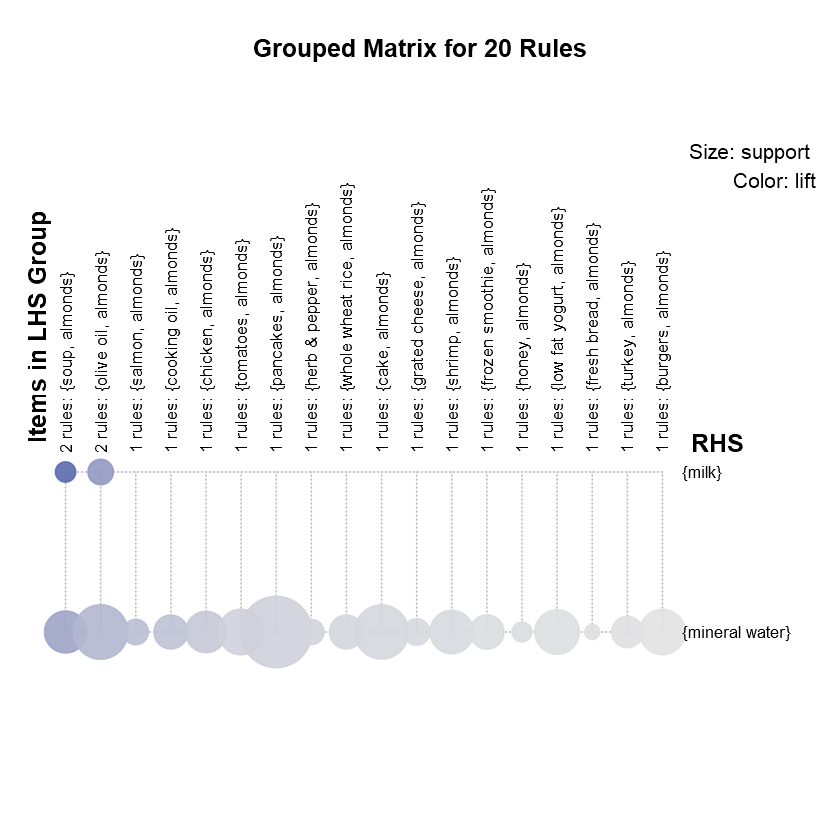

In [80]:
plot(water[1:20] , method="grouped", measure="support", control=list(col=sequential_hcl(100)))

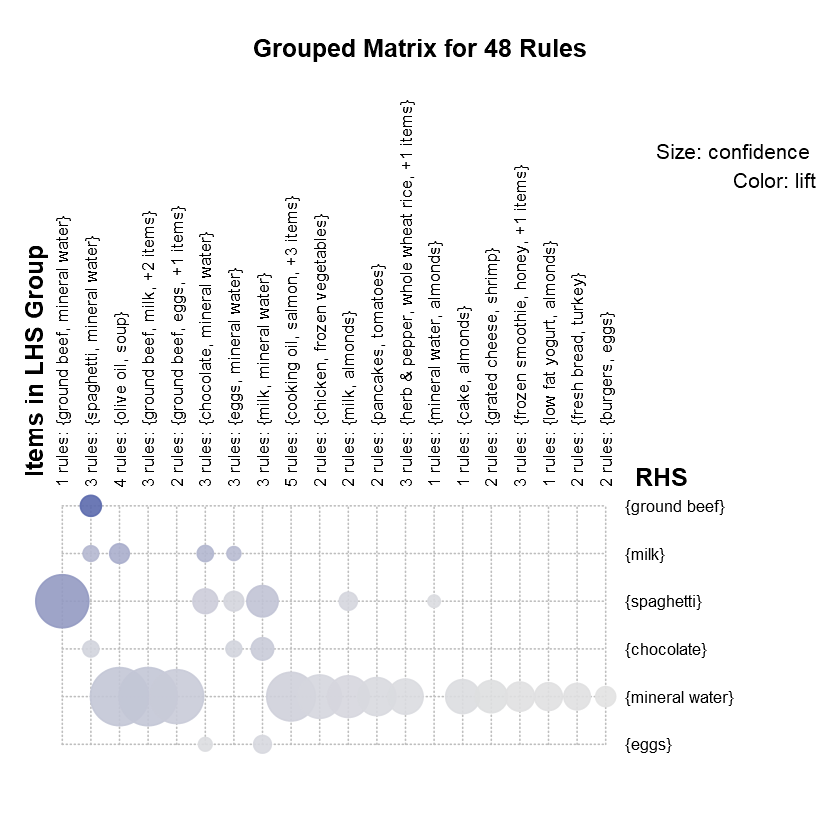

In [53]:
plot(water, method="grouped", measure="confidence", control=list(col=sequential_hcl(100)))

# Graph based visualizations



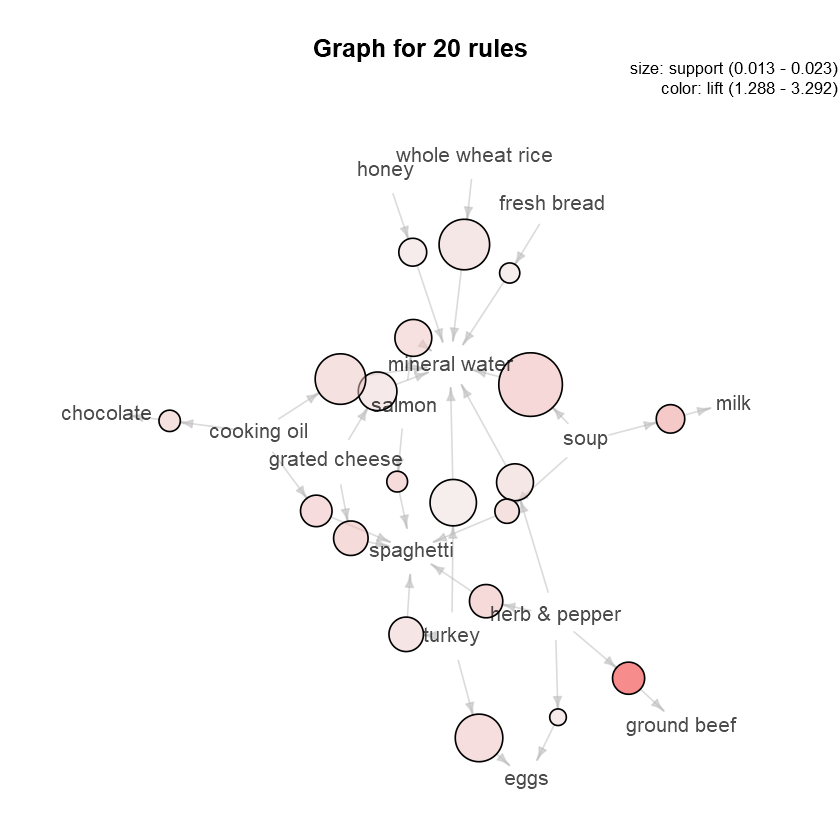

In [60]:
plot(rule_2[1:20], method="graph")

# Parallel coordinates plot

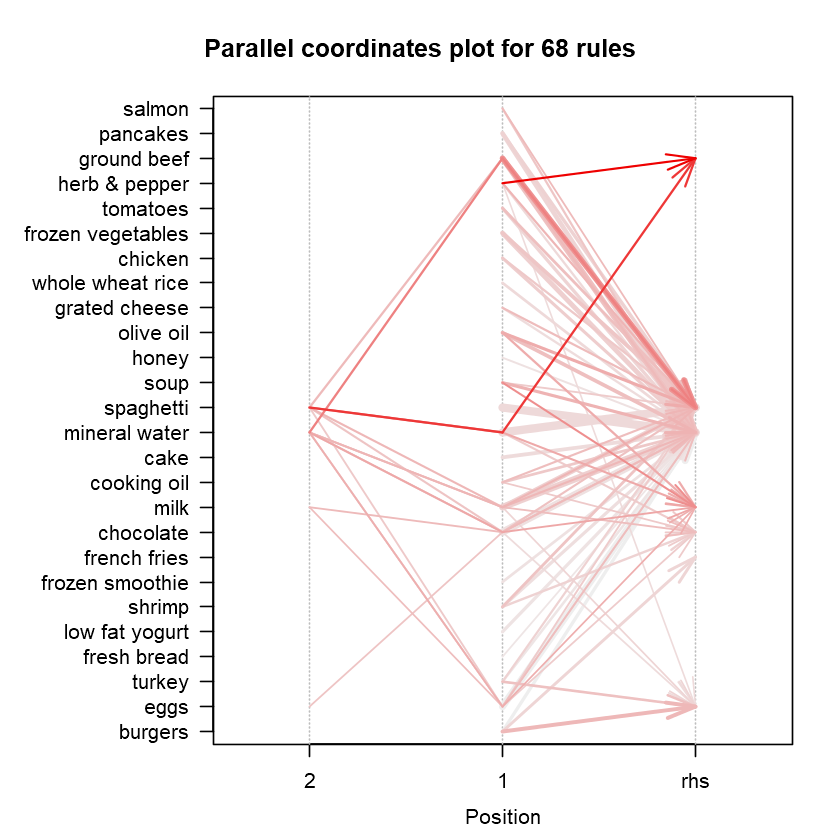

In [68]:
plot(rule_2, method="paracoord", control=list(reorder=TRUE))

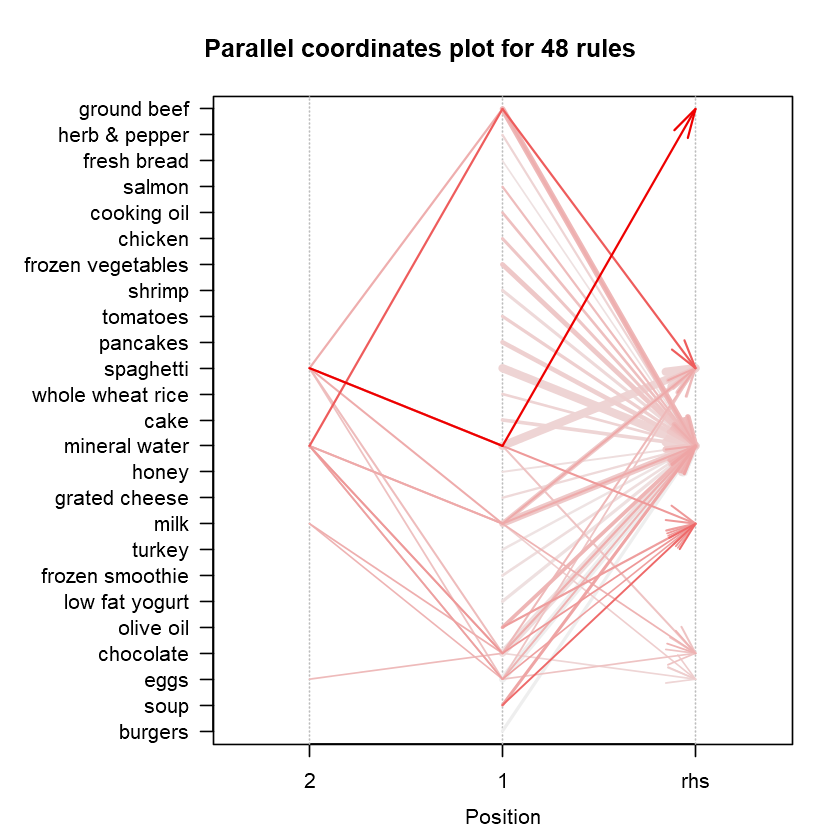

In [65]:
plot(water, method="paracoord", control=list(reorder=TRUE))

#   Saving Association rules 

In [82]:
write(rule_2, file = "cart_rules.csv", sep = ",", quote = TRUE, row.names = FALSE)

In [81]:
getwd()

[1] "C:/Users/ak"







***



***

***

***

***

# PROJECT : 2  

***

***

***

****

***************

***

In [93]:
library(ggplot2)
library(dplyr)
library(readr)
library(data.table)
library(knitr)
library(sqldf)
library(arules)
library(arulesViz)
library("stringr")
library("htmlwidgets")
library("Hmisc")
library(psych)

In [94]:
orders <- fread("https://s3.amazonaws.com/hackerday.datascience/87/orders.csv")

In [95]:
head(orders)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2539329,1,prior,1,2,8,NA
2398795,1,prior,2,3,7,15
473747,1,prior,3,3,12,21
2254736,1,prior,4,4,7,29
431534,1,prior,5,4,15,28
3367565,1,prior,6,2,7,19


In [96]:
products<-fread('https://s3.amazonaws.com/hackerday.datascience/87/products.csv')

In [97]:
head(products)

product_id,product_name,aisle_id,department_id
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1
5,Green Chile Anytime Sauce,5,13
6,Dry Nose Oil,11,11


In [98]:
order_products_prior <- fread('https://s3.amazonaws.com/hackerday.datascience/87/order_products__prior.csv')

In [99]:
head(order_products_prior)

order_id,product_id,add_to_cart_order,reordered
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
2,17794,6,1


In [100]:
order_products_train <- fread('https://s3.amazonaws.com/hackerday.datascience/87/order_products__train.csv')

In [101]:
kable(head(order_products_train))



| order_id| product_id| add_to_cart_order| reordered|
|--------:|----------:|-----------------:|---------:|
|        1|      49302|                 1|         1|
|        1|      11109|                 2|         1|
|        1|      10246|                 3|         0|
|        1|      49683|                 4|         0|
|        1|      43633|                 5|         1|
|        1|      13176|                 6|         0|

In [102]:
aisles <- fread('https://s3.amazonaws.com/hackerday.datascience/87/aisles.csv')

In [103]:
head(aisles)

aisle_id,aisle
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation
6,other


In [104]:
departments <- fread('https://s3.amazonaws.com/hackerday.datascience/87/departments.csv')

In [105]:
head(departments)

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international


In [106]:
# List of the tables 

# orders , products , order_products_prior , order_products_train ,aisles , departments 

In [107]:
str(orders) #dow : days of week

Classes 'data.table' and 'data.frame':	39999 obs. of  7 variables:
 $ order_id              : int  2539329 2398795 473747 2254736 431534 3367565 550135 3108588 2295261 2550362 ...
 $ user_id               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ eval_set              : chr  "prior" "prior" "prior" "prior" ...
 $ order_number          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ order_dow             : int  2 3 3 4 4 2 1 1 1 4 ...
 $ order_hour_of_day     : int  8 7 12 7 15 7 9 14 16 8 ...
 $ days_since_prior_order: num  NA 15 21 29 28 19 20 14 0 30 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [108]:
str(products)

Classes 'data.table' and 'data.frame':	39999 obs. of  4 variables:
 $ product_id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ product_name : chr  "Chocolate Sandwich Cookies" "All-Seasons Salt" "Robust Golden Unsweetened Oolong Tea" "Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce" ...
 $ aisle_id     : int  61 104 94 38 5 11 98 116 120 115 ...
 $ department_id: int  19 13 7 1 13 11 7 1 16 7 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [109]:
str(order_products_prior)

Classes 'data.table' and 'data.frame':	39999 obs. of  4 variables:
 $ order_id         : int  2 2 2 2 2 2 2 2 2 3 ...
 $ product_id       : int  33120 28985 9327 45918 30035 17794 40141 1819 43668 33754 ...
 $ add_to_cart_order: int  1 2 3 4 5 6 7 8 9 1 ...
 $ reordered        : int  1 1 0 1 0 1 1 1 0 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [110]:
str(order_products_train)

Classes 'data.table' and 'data.frame':	39999 obs. of  4 variables:
 $ order_id         : int  1 1 1 1 1 1 1 1 36 36 ...
 $ product_id       : int  49302 11109 10246 49683 43633 13176 47209 22035 39612 19660 ...
 $ add_to_cart_order: int  1 2 3 4 5 6 7 8 1 2 ...
 $ reordered        : int  1 1 0 0 1 0 0 1 0 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [111]:
str(aisles)

Classes 'data.table' and 'data.frame':	134 obs. of  2 variables:
 $ aisle_id: int  1 2 3 4 5 6 7 8 9 10 ...
 $ aisle   : chr  "prepared soups salads" "specialty cheeses" "energy granola bars" "instant foods" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [113]:
str(departments)

Classes 'data.table' and 'data.frame':	21 obs. of  2 variables:
 $ department_id: int  1 2 3 4 5 6 7 8 9 10 ...
 $ department   : chr  "frozen" "other" "bakery" "produce" ...
 - attr(*, ".internal.selfref")=<externalptr> 


#### Does these Datasets  having any NAs [  missing values ] ; Let's check that .

In [114]:
kable(colSums(is.na(orders)))



|                       |    x|
|:----------------------|----:|
|order_id               |    0|
|user_id                |    0|
|eval_set               |    0|
|order_number           |    0|
|order_dow              |    0|
|order_hour_of_day      |    0|
|days_since_prior_order | 2468|

why days_since_prior_order having 2468 missing values , was it not recorded ? ,can be ignored and delete it directly or imputation is possible;can replace NAs with numeric_values [mean ,median ,mode ,range...etc] OR character values.will check on this later stage .

In [115]:
colSums(is.na(products)) 

product_id  product_name      aisle_id department_id 
            0             0             0             0

In [116]:
colSums(is.na(order_products_prior))

order_id        product_id add_to_cart_order         reordered 
                0                 0                 0                 0

In [117]:
colSums(is.na(order_products_train))

order_id        product_id add_to_cart_order         reordered 
                0                 0                 0                 0

In [118]:
colSums(is.na(aisles))

aisle_id    aisle 
       0        0

In [119]:
colSums(is.na(departments))

department_id    department 
            0             0

In [120]:
# which Days of the week company received most orders 

kable(head(orders,n = 20))



| order_id| user_id|eval_set | order_number| order_dow| order_hour_of_day| days_since_prior_order|
|--------:|-------:|:--------|------------:|---------:|-----------------:|----------------------:|
|  2539329|       1|prior    |            1|         2|                 8|                     NA|
|  2398795|       1|prior    |            2|         3|                 7|                     15|
|   473747|       1|prior    |            3|         3|                12|                     21|
|  2254736|       1|prior    |            4|         4|                 7|                     29|
|   431534|       1|prior    |            5|         4|                15|                     28|
|  3367565|       1|prior    |            6|         2|                 7|                     19|
|   550135|       1|prior    |            7|         1|                 9|                     20|
|  3108588|       1|prior    |            8|         1|                14|                     14|
|  22952

In [121]:
orders$order_days_of_week <- ifelse(orders$order_dow == 0 , "Sunday",
                                       ifelse(orders$order_dow == 1 ,"Monday",
                                             ifelse(orders$order_dow == 2 ,"Tuesday",
                                                   ifelse(orders$order_dow == 3 ,"Wednesday",
                                                         ifelse(orders$order_dow == 4 ,"Thursday",
                                                               ifelse(orders$order_dow == 5 ,"Friday",
                                                                     ifelse(orders$order_dow == 6 ,"Saturday","")))))))      

In [122]:
kable(head(orders))



| order_id| user_id|eval_set | order_number| order_dow| order_hour_of_day| days_since_prior_order|order_days_of_week |
|--------:|-------:|:--------|------------:|---------:|-----------------:|----------------------:|:------------------|
|  2539329|       1|prior    |            1|         2|                 8|                     NA|Tuesday            |
|  2398795|       1|prior    |            2|         3|                 7|                     15|Wednesday          |
|   473747|       1|prior    |            3|         3|                12|                     21|Wednesday          |
|  2254736|       1|prior    |            4|         4|                 7|                     29|Thursday           |
|   431534|       1|prior    |            5|         4|                15|                     28|Thursday           |
|  3367565|       1|prior    |            6|         2|                 7|                     19|Tuesday            |

In [123]:
str(orders)

Classes 'data.table' and 'data.frame':	39999 obs. of  8 variables:
 $ order_id              : int  2539329 2398795 473747 2254736 431534 3367565 550135 3108588 2295261 2550362 ...
 $ user_id               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ eval_set              : chr  "prior" "prior" "prior" "prior" ...
 $ order_number          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ order_dow             : int  2 3 3 4 4 2 1 1 1 4 ...
 $ order_hour_of_day     : int  8 7 12 7 15 7 9 14 16 8 ...
 $ days_since_prior_order: num  NA 15 21 29 28 19 20 14 0 30 ...
 $ order_days_of_week    : chr  "Tuesday" "Wednesday" "Wednesday" "Thursday" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [124]:
#Let's change the order_days_of_week from character to factor 

orders$order_days_of_week <- as.factor(orders$order_days_of_week)

In [125]:
str(orders)

Classes 'data.table' and 'data.frame':	39999 obs. of  8 variables:
 $ order_id              : int  2539329 2398795 473747 2254736 431534 3367565 550135 3108588 2295261 2550362 ...
 $ user_id               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ eval_set              : chr  "prior" "prior" "prior" "prior" ...
 $ order_number          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ order_dow             : int  2 3 3 4 4 2 1 1 1 4 ...
 $ order_hour_of_day     : int  8 7 12 7 15 7 9 14 16 8 ...
 $ days_since_prior_order: num  NA 15 21 29 28 19 20 14 0 30 ...
 $ order_days_of_week    : Factor w/ 7 levels "Friday","Monday",..: 6 7 7 5 5 6 2 2 2 5 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [126]:
kable(table(orders$order_days_of_week))



|Var1      | Freq|
|:---------|----:|
|Friday    | 5417|
|Monday    | 6834|
|Saturday  | 5188|
|Sunday    | 7110|
|Thursday  | 4856|
|Tuesday   | 5472|
|Wednesday | 5122|

In [127]:
# visualization of orders placed by different days of the week

kable(sqldf("select order_days_of_week , count(order_number) as no_of_orders from orders group by order_days_of_week
                          order by no_of_orders desc"))



|order_days_of_week | no_of_orders|
|:------------------|------------:|
|Sunday             |         7110|
|Monday             |         6834|
|Tuesday            |         5472|
|Friday             |         5417|
|Saturday           |         5188|
|Wednesday          |         5122|
|Thursday           |         4856|

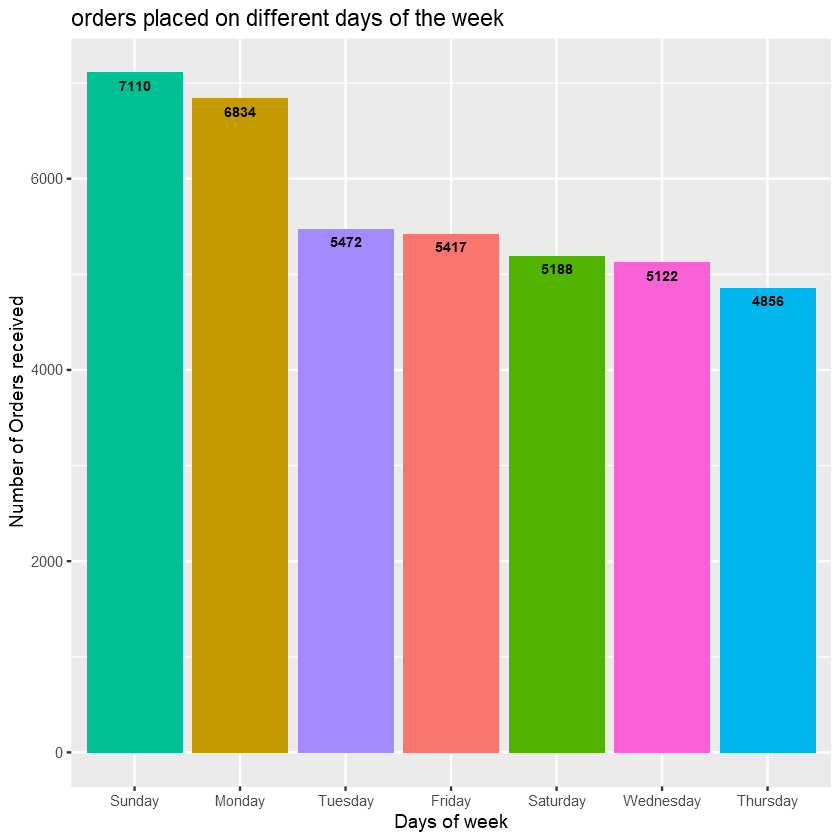

In [128]:
ggplot(sqldf("select order_days_of_week , count(order_number) no_of_orders from orders 
          group by order_days_of_week"),
              aes(reorder(order_days_of_week,-no_of_orders), y = no_of_orders , fill = order_days_of_week)) +
              geom_bar(stat = "identity")+
              guides(fill = F)+
              geom_text(aes(label = no_of_orders) ,vjust = 1.8,size = 2.8,fontface = "bold")+
              labs(x = "Days of week" , y = "Number of Orders received",
                   title = "orders placed on different days of the week")

In [129]:
# Which Department is mostly purchased by different Days of week

product_dept <- merge(x = products , y = departments , by = "department_id")

In [130]:
kable(head(product_dept,8));dim(product_dept)



| department_id| product_id|product_name                                                      | aisle_id|department |
|-------------:|----------:|:-----------------------------------------------------------------|--------:|:----------|
|             1|          4|Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce |       38|frozen     |
|             1|          8|Cut Russet Potatoes Steam N' Mash                                 |      116|frozen     |
|             1|         12|Chocolate Fudge Layer Cake                                        |      119|frozen     |
|             1|         18|Pizza for One Suprema  Frozen Pizza                               |       79|frozen     |
|             1|         30|Three Cheese Ziti, Marinara with Meatballs                        |       38|frozen     |
|             1|         36|Traditional Lasagna with Meat Sauce Savory Italian Recipes        |       38|frozen     |
|             1|         46|Raisin Cinnamon Bagels 5 c

[1] 39999     5

In [131]:
dim(orders);head(orders,2)

[1] 39999     8

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_days_of_week
2539329,1,prior,1,2,8,NA,Tuesday
2398795,1,prior,2,3,7,15,Wednesday


In [132]:
dim(products);head(products,2)

[1] 39999     4

product_id,product_name,aisle_id,department_id
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13


In [133]:
dim(order_products_prior);head(order_products_prior,2)

[1] 39999     4

order_id,product_id,add_to_cart_order,reordered
2,33120,1,1
2,28985,2,1


In [134]:
dim(order_products_train);head(order_products_train,2)

[1] 39999     4

order_id,product_id,add_to_cart_order,reordered
1,49302,1,1
1,11109,2,1


In [135]:
dim(aisles);head(aisles,2)

[1] 134   2

aisle_id,aisle
1,prepared soups salads
2,specialty cheeses


In [136]:
dim(departments);head(departments,2)

[1] 21  2

department_id,department
1,frozen
2,other


# Assocation Rules

In [137]:
kable(products[1:10 ,])



| product_id|product_name                                                      | aisle_id| department_id|
|----------:|:-----------------------------------------------------------------|--------:|-------------:|
|          1|Chocolate Sandwich Cookies                                        |       61|            19|
|          2|All-Seasons Salt                                                  |      104|            13|
|          3|Robust Golden Unsweetened Oolong Tea                              |       94|             7|
|          4|Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce |       38|             1|
|          5|Green Chile Anytime Sauce                                         |        5|            13|
|          6|Dry Nose Oil                                                      |       11|            11|
|          7|Pure Coconut Water With Orange                                    |       98|             7|
|          8|Cut Russet Potatoes Steam N' Ma

In [138]:
kable(order_products_prior[1:10 ,])



| order_id| product_id| add_to_cart_order| reordered|
|--------:|----------:|-----------------:|---------:|
|        2|      33120|                 1|         1|
|        2|      28985|                 2|         1|
|        2|       9327|                 3|         0|
|        2|      45918|                 4|         1|
|        2|      30035|                 5|         0|
|        2|      17794|                 6|         1|
|        2|      40141|                 7|         1|
|        2|       1819|                 8|         1|
|        2|      43668|                 9|         0|
|        3|      33754|                 1|         1|

In [139]:
mydata <- order_products_prior[,1:2]

In [140]:
mydata <- merge(x = mydata , y = products , by = "product_id")

In [141]:
mydata <- arrange(mydata , order_id)

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

In [142]:
kable(head(mydata))



| product_id| order_id|product_name                             | aisle_id| department_id|
|----------:|--------:|:----------------------------------------|--------:|-------------:|
|       1819|        2|All Natural No Stir Creamy Almond Butter |       88|            13|
|       9327|        2|Garlic Powder                            |      104|            13|
|      17794|        2|Carrots                                  |       83|             4|
|      28985|        2|Michigan Organic Kale                    |       83|             4|
|      30035|        2|Natural Sweetener                        |       17|            13|
|      33120|        2|Organic Egg Whites                       |       86|            16|

In [143]:
mydata <- mydata[,2:3]

In [144]:
kable(head(mydata))



| order_id|product_name                             |
|--------:|:----------------------------------------|
|        2|All Natural No Stir Creamy Almond Butter |
|        2|Garlic Powder                            |
|        2|Carrots                                  |
|        2|Michigan Organic Kale                    |
|        2|Natural Sweetener                        |
|        2|Organic Egg Whites                       |

##### Here Datasets are disjoint . Since we are going to apply arules or MBA we need transactional datasets

Let's convert the given data into  transactional datasets

In [145]:
dt <- split(mydata$product_name , mydata$order_id)

In [147]:
dt[1:10]

$`2`
[1] "All Natural No Stir Creamy Almond Butter"
[2] "Garlic Powder"                           
[3] "Carrots"                                 
[4] "Michigan Organic Kale"                   
[5] "Natural Sweetener"                       
[6] "Organic Egg Whites"                      

$`3`
[1] "Air Chilled Organic Boneless Skinless Chicken Breasts"
[2] "Unsweetened Chocolate Almond Breeze Almond Milk"      
[3] "Lemons"                                               
[4] "Organic Baby Spinach"                                 
[5] "Unsweetened Almondmilk"                               
[6] "Organic Ezekiel 49 Bread Cinnamon Raisin"             
[7] "Total 2% with Strawberry Lowfat Greek Strained Yogurt"

$`4`
 [1] "Kellogg's Nutri-Grain Apple Cinnamon Cereal"            
 [2] "Goldfish Cheddar Baked Snack Crackers"                  
 [3] "Nutri-Grain Soft Baked Strawberry Cereal Breakfast Bars"
 [4] "Kellogg's Nutri-Grain Blueberry Cereal"                 
 [5] "Original Orange Juice"                                  
 [6] "Honey/Lemon Cough Drops"                                
 [7] "Oats & Chocolate Chewy Bars"                            
 [8] "Sugarfree Energy Drink"                                 
 [9] "Tiny Twists Pretzels"                                   
[10] "Chewy 25% Low Sugar Chocolate Chip Granola"             

$`5`
 [1] "Clementines"                             
 [2] "Mini Original Babybel Cheese"            
 [3] "Original Black Box Tablewater Cracker"   
 [4] "Matzos, Thin, Tea"                       
 [5] "Apricot Preserves"                       
 [6] "Bag of Organic Bananas"                  
 [7] "Natural Artesian Water, Mini & Mobile"   
 [8] "Just Crisp, Parmesan"                    
 [9] "French Lavender Hand Wash"               
[10] "Dairy Milk Fruit & Nut Chocolate Bar"    
[11] "2% Reduced Fat Milk"                     
[12] "Wafer, Chocolate"                        
[13] "Boneless Skinless Chicken Breast Fillets"
[14] "Organic Raspberries"                     
[15] "Artichokes"                              
[16] "Meyer Lemon"                             

$`6`
[1] "Dryer Sheets Geranium Scent"

$`7`
[1] "Orange Juice"

$`8`
[1] "Original Hawaiian Sweet Rolls"

$`9`
 [1] "Vanilla Almond Breeze Almond Milk"                              
 [2] "Low Fat Kefir Cultured Milk Smoothie Lowfat Probiotic Blueberry"
 [3] "Natural Sharp Cheddar Sliced Cheese"                            
 [4] "Baby Spinach"                                                   
 [5] "Fruit & Nutty Almonds Raisins Cranberries Pecans Granola"       
 [6] "Green Beans"                                                    
 [7] "Organic Bread with 21 Whole Grains"                             
 [8] "Organic Red Radish, Bunch"                                      
 [9] "Distilled Water"                                                
[10] "100% Apple Juice Original"                                      
[11] "Snak-Saks Crackers"                                             
[12] "Extra Virgin Olive Oil"                                         
[13] "Natural Applesauce Snack & Go Pouches"                          

$`10`
 [1] "Parsley, Italian (Flat), New England Grown"       
 [2] "Organic Butterhead (Boston, Butter, Bibb) Lettuce"
 [3] "Yellow Onions"                                    
 [4] "Baby Portabella Mushrooms"                        
 [5] "Green Beans"                                      
 [6] "Organic Strawberries"                             
 [7] "Stage 2 Green Bean Pear Greek Yogurt Baby Food"   
 [8] "Banana"                                           
 [9] "Organic Sunchoke"                                 
[10] "Boneless Beef Sirloin Steak"                      
[11] "Organic Black Beans"                              
[12] "Organic Cilantro"                                 
[13] "Spinach Peas & Pear Stage 2 Baby Food"            

$`11`
[1] "Tortilla Strips Restaurant Style"      
[2] "Traditional Refried Beans"          

In [149]:
dt2 <- as(dt , 'transactions')

In [150]:
summary(dt2)

transactions as itemMatrix in sparse format with
 3934 rows (elements/itemsets/transactions) and
 8390 columns (items) and a density of 0.0009610904 

most frequent items:
                Banana Bag of Organic Bananas   Organic Strawberries 
                   605                    510                    327 
  Organic Baby Spinach           Strawberries                (Other) 
                   275                    173                  29832 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
239 305 343 367 331 324 300 265 224 182 179 143 109 106  78  75  66  54  53  41 
 21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37  38  39  40  48 
 30  24  17  16   8  12   7   4   8   4   2   3   2   2   2   2   1   2   1   1 
 51 
  2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   4.000   7.000   8.064  11.000  51.000 

includes extended item information - examples:
         

# visualizing most frequent items 

In [153]:
sample(itemFrequency(x = dt2 , type = 'relative') ,20)

Lavender Dish Soap 
                                    0.0025419420 
                              Morning Oat Crunch 
                                    0.0012709710 
                       Mac & Cheese with Chicken 
                                    0.0002541942 
             Dark Chocolate with Whole Hazelnuts 
                                    0.0005083884 
                            French Vanilla Syrup 
                                    0.0002541942 
                   from Concentrate Mango Nectar 
                                    0.0002541942 
                             Best Cinnamon Bread 
                                    0.0002541942 
                            Organic Yellow Onion 
                                    0.0360955770 
                         Atlantic Salmon Fillets 
                                    0.0002541942 
                   Ginger Yuzu Scented Dish Soap 
                                    0.0005083884 
              Hazed & Confusedâ¢ Core Ice Cream 
                                    0.0002541942 
             Flax Plus Maple Pecan Crunch Cereal 
                                    0.0005083884 
                          Butter Top Wheat Bread 
                                    0.0005083884 
                           Thick Spaghetti Pasta 
                                    0.0002541942 
Organic Seaweed Black Sesame Super Seed Crackers 
                                    0.0002541942 
                              Apple Jacks Cereal 
                                    0.0007625826 
                      Little Sumpin' Sumpin' Ale 
                                    0.0002541942 
                       Organic Tomato Basil Soup 
                                    0.0002541942 
                            Oat Bran Gluten Free 
                                    0.0002541942 
                         Unsweetened Cashew Milk 
                                    0.0007625826

In [155]:
sample(itemFrequency(x = dt2 , type = 'absolute') ,20)

Diet Pepsi Pack 
                                                        5 
                                Baby Portabella Mushrooms 
                                                        5 
                                    Original Orange Juice 
                                                       32 
Steel Cut Cranberry Vanilla Almond Flavor Instant Oatmeal 
                                                        1 
                      0% Fat Organic Greek Vanilla Yogurt 
                                                        2 
                                            Veggie Ground 
                                                        1 
           Pet Stain & Odor Remover + Oxy, Fresh Blossoms 
                                                        1 
                      Fancy Shredded Cheese Italian Blend 
                                                        2 
                                                     Salt 
                                                        2 
                                          Chicken Pot Pie 
                                                       12 
                                      Indian Paneer Tikka 
                                                        4 
                         Medium Roast Cafe Domingo Ground 
                                                        1 
                       Bread, Gluten Free, White Sandwich 
                                                        1 
                              Organic Snipped Green Beans 
                                                       17 
                                          Heirloom Tomato 
                                                        4 
                                         Cara Cara Orange 
                                                        1 
                 2-Ply 100% Recycled White Facial Tissues 
                                                        2 
                                Portabella Veggie Burgers 
                                                        1 
                    Sensitive Facial Cleansing Towelettes 
                                                        2 
                                    B 12 Liquid B Complex 
                                                        1

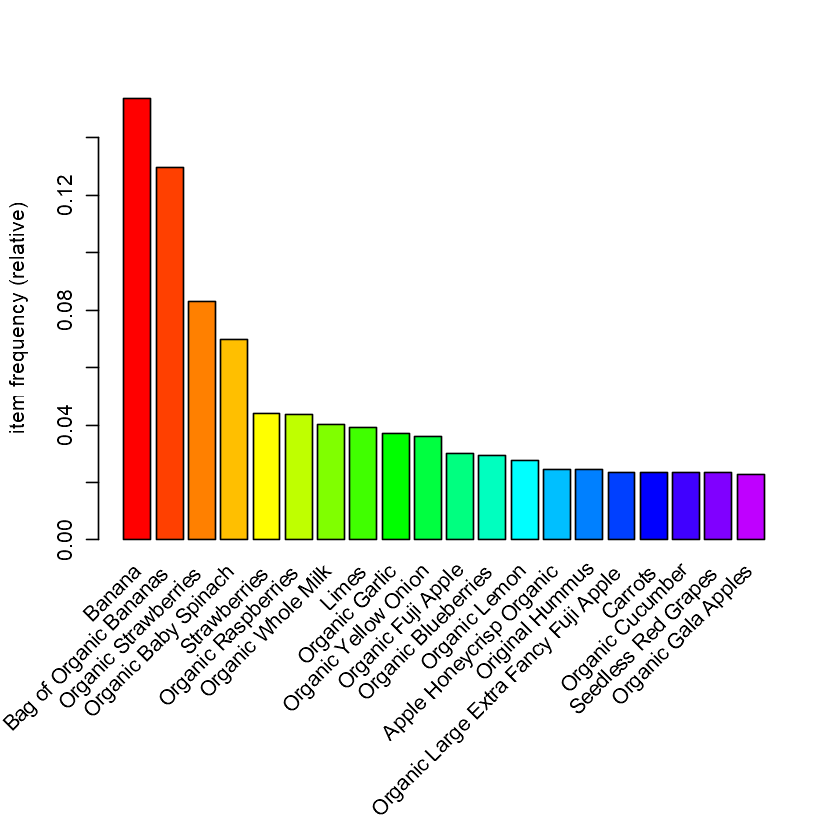

In [156]:
itemFrequencyPlot(x = dt2 ,topN=20, type = 'relative',col = rainbow(24))

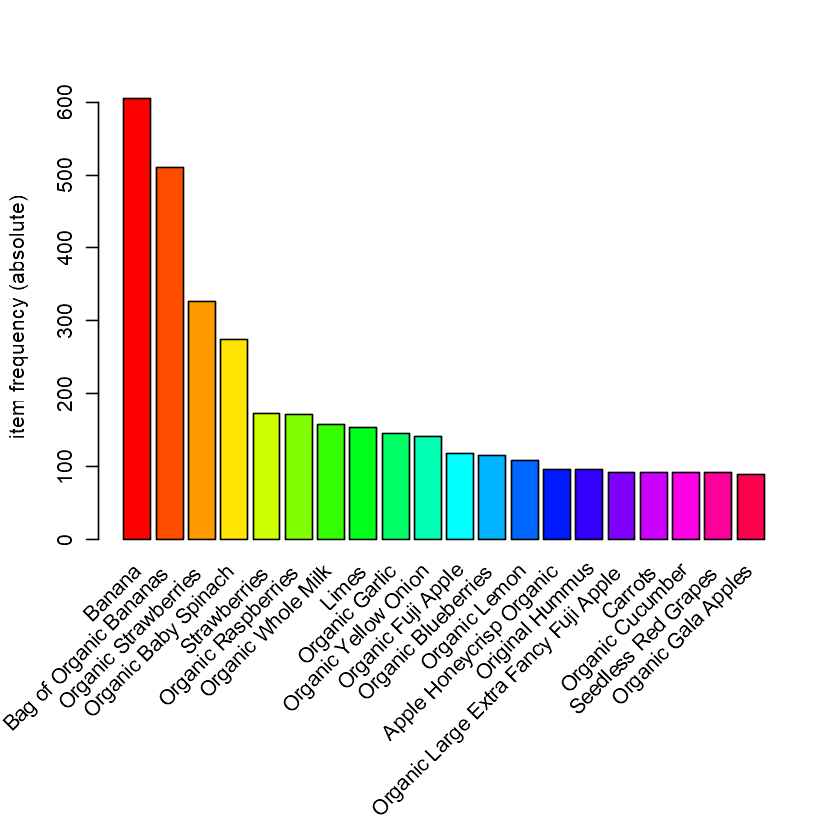

In [157]:
itemFrequencyPlot(x = dt2 ,topN=20, type = 'absolute',col = rainbow(20))

In [159]:
rule_3 <- apriori(data = dt2,parameter = list(support = 0.001 ,confidence = 0.90))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8390 item(s), 3934 transaction(s)] done [0.02s].
sorting and recoding items ... [1821 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.04s].
writing ... [25 rule(s)] done [0.01s].
creating S4 object  ... done [0.00s].


In [160]:
rule_4 <- apriori(data = dt2,parameter = list(support = 0.01 ,confidence = 0.90))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 39 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8390 item(s), 3934 transaction(s)] done [0.00s].
sorting and recoding items ... [83 item(s)] done [0.01s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [161]:
rule_5 <- apriori(data = dt2,parameter = list(support = 0.1 ,confidence = 0.90))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 393 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8390 item(s), 3934 transaction(s)] done [0.01s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [163]:
# Rule_3 is the best to select for given support and confidenace values 
# for others ,we are not able to get enough rules even though changing the confidence inter to 0.50

In [165]:
rule_3

set of 25 rules 

In [166]:
inspect(rule_3)

     lhs                                                                   rhs                                               support confidence       lift count
[1]  {Deli Fresh Honey Smoked Turkey Breast, 98% Fat Free, Gluten Free} => {Banana}                                      0.001016777          1   6.502479     4
[2]  {Quaker Life Cinnamon Cereal}                                      => {Banana}                                      0.001016777          1   6.502479     4
[3]  {Mediterranee Strawberry Yogurt}                                   => {Coconut Yogurt}                              0.001016777          1 786.800000     4
[4]  {Organic Chamomile with Lavender Herbal Tea Bags}                  => {Bag of Organic Bananas}                      0.001016777          1   7.713725     4
[5]  {Blueberry on the Bottom Nonfat Greek Yogurt,                                                                                                              
      Pomegranate on the Bottom No

In [167]:
summary(rule_3)

set of 25 rules

rule length distribution (lhs + rhs):sizes
 2  3  4 
 4 20  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    3.00    3.00    2.88    3.00    4.00 

summary of quality measures:
    support           confidence      lift             count     
 Min.   :0.001017   Min.   :1    Min.   :  6.503   Min.   :4.00  
 1st Qu.:0.001017   1st Qu.:1    1st Qu.:  7.714   1st Qu.:4.00  
 Median :0.001017   Median :1    Median :  7.714   Median :4.00  
 Mean   :0.001088   Mean   :1    Mean   : 69.236   Mean   :4.28  
 3rd Qu.:0.001017   3rd Qu.:1    3rd Qu.: 14.306   3rd Qu.:4.00  
 Max.   :0.001525   Max.   :1    Max.   :786.800   Max.   :6.00  

mining info:
 data ntransactions support confidence
  dt2          3934   0.001        0.9

In [168]:
rule_6 <- apriori(data = dt2,parameter = list(support = 0.001 ,confidence = 0.80))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8390 item(s), 3934 transaction(s)] done [0.02s].
sorting and recoding items ... [1821 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.03s].
writing ... [57 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


##### we change the confidence interval to 0.80 ,this change creates 57 rules however with 0.90 confidenance able to create 25 rules 

In [169]:
rule_7 <- apriori(data = dt2,parameter = list(support = 0.001 ,confidence = 0.80 ,minlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8390 item(s), 3934 transaction(s)] done [0.02s].
sorting and recoding items ... [1821 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.03s].
writing ... [40 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [170]:
rule_8 <- apriori(data = dt2,parameter = list(support = 0.001 ,confidence = 0.90 ,minlen = 3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.001      3
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[8390 item(s), 3934 transaction(s)] done [0.02s].
sorting and recoding items ... [1821 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.03s].
writing ... [21 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


# converting the rules into a data frame

In [171]:
rule3 <- as(rule_3 , "data.frame") 

In [172]:
rule3

rules,support,confidence,lift,count
"{Deli Fresh Honey Smoked Turkey Breast, 98% Fat Free, Gluten Free} => {Banana}",0.001016777,1,6.502479,4
{Quaker Life Cinnamon Cereal} => {Banana},0.001016777,1,6.502479,4
{Mediterranee Strawberry Yogurt} => {Coconut Yogurt},0.001016777,1,786.800000,4
{Organic Chamomile with Lavender Herbal Tea Bags} => {Bag of Organic Bananas},0.001016777,1,7.713725,4
"{Blueberry on the Bottom Nonfat Greek Yogurt,Pomegranate on the Bottom Non-Fat Greek Yogurt} => {Peach on the Bottom Nonfat Greek Yogurt}",0.001016777,1,262.266667,4
"{Peach on the Bottom Nonfat Greek Yogurt,Pomegranate on the Bottom Non-Fat Greek Yogurt} => {Blueberry on the Bottom Nonfat Greek Yogurt}",0.001016777,1,393.400000,4
"{Celery Hearts,Organic Raspberries} => {Bag of Organic Bananas}",0.001016777,1,7.713725,4
"{Organic Bread with 21 Whole Grains,Organic Large Grade AA Brown Eggs} => {Bag of Organic Bananas}",0.001016777,1,7.713725,4
"{Organic Cilantro,Organic Roma Tomato} => {Organic Baby Spinach}",0.001016777,1,14.305455,4
"{Organic Cucumber,Organic Roma Tomato} => {Organic Baby Spinach}",0.001016777,1,14.305455,4


In [173]:
inspect(subset(rule_3,subset= rhs %pin% 'Banana'))

     lhs                                                                   rhs                          support confidence     lift count
[1]  {Deli Fresh Honey Smoked Turkey Breast, 98% Fat Free, Gluten Free} => {Banana}                 0.001016777          1 6.502479     4
[2]  {Quaker Life Cinnamon Cereal}                                      => {Banana}                 0.001016777          1 6.502479     4
[3]  {Organic Chamomile with Lavender Herbal Tea Bags}                  => {Bag of Organic Bananas} 0.001016777          1 7.713725     4
[4]  {Celery Hearts,                                                                                                                     
      Organic Raspberries}                                              => {Bag of Organic Bananas} 0.001016777          1 7.713725     4
[5]  {Organic Bread with 21 Whole Grains,                                                                                                
      Organic Large Grade AA Brown

In [174]:
# before recommending the products to the company you can sort the rules
inspect(head(sort(rule_3,by='lift'),5))

    lhs                                                 rhs                                               support confidence      lift count
[1] {Mediterranee Strawberry Yogurt}                 => {Coconut Yogurt}                              0.001016777          1 786.80000     4
[2] {Peach on the Bottom Nonfat Greek Yogurt,                                                                                               
     Pomegranate on the Bottom Non-Fat Greek Yogurt} => {Blueberry on the Bottom Nonfat Greek Yogurt} 0.001016777          1 393.40000     4
[3] {Blueberry on the Bottom Nonfat Greek Yogurt,                                                                                           
     Pomegranate on the Bottom Non-Fat Greek Yogurt} => {Peach on the Bottom Nonfat Greek Yogurt}     0.001016777          1 262.26667     4
[4] {Frozen Organic Wild Blueberries,                                                                                                       
     Organic 

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


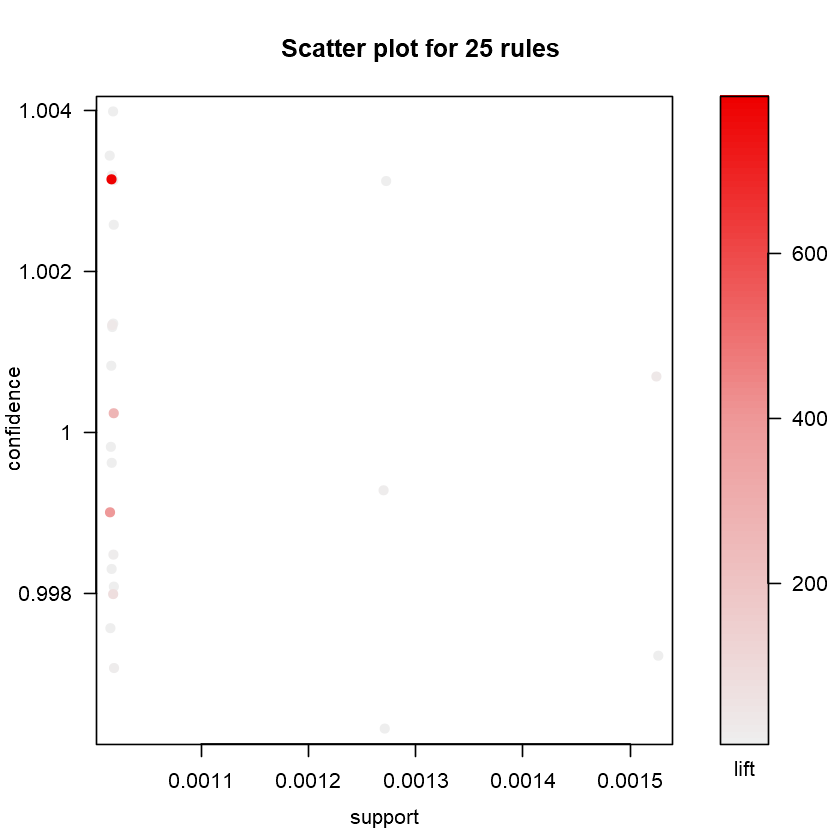

In [175]:
plot(rule_3)

# Matrix based visulaization

Itemsets in Antecedent (LHS)
 [1] "{Mediterranee Strawberry Yogurt}"                                                            
 [2] "{Peach on the Bottom Nonfat Greek Yogurt,Pomegranate on the Bottom Non-Fat Greek Yogurt}"    
 [3] "{Blueberry on the Bottom Nonfat Greek Yogurt,Pomegranate on the Bottom Non-Fat Greek Yogurt}"
 [4] "{Frozen Organic Wild Blueberries,Organic Gala Apples}"                                       
 [5] "{Organic Carrot Bunch,Organic Garlic}"                                                       
 [6] "{Organic Cilantro,Organic Coconut Milk}"                                                     
 [7] "{Organic Cilantro,Organic Roma Tomato}"                                                      
 [8] "{Organic Cucumber,Organic Roma Tomato}"                                                      
 [9] "{Organic Raspberries,Organic Yellow Peaches}"                                                
[10] "{Organic Green Seedless Grapes,Original Hummus}"                 

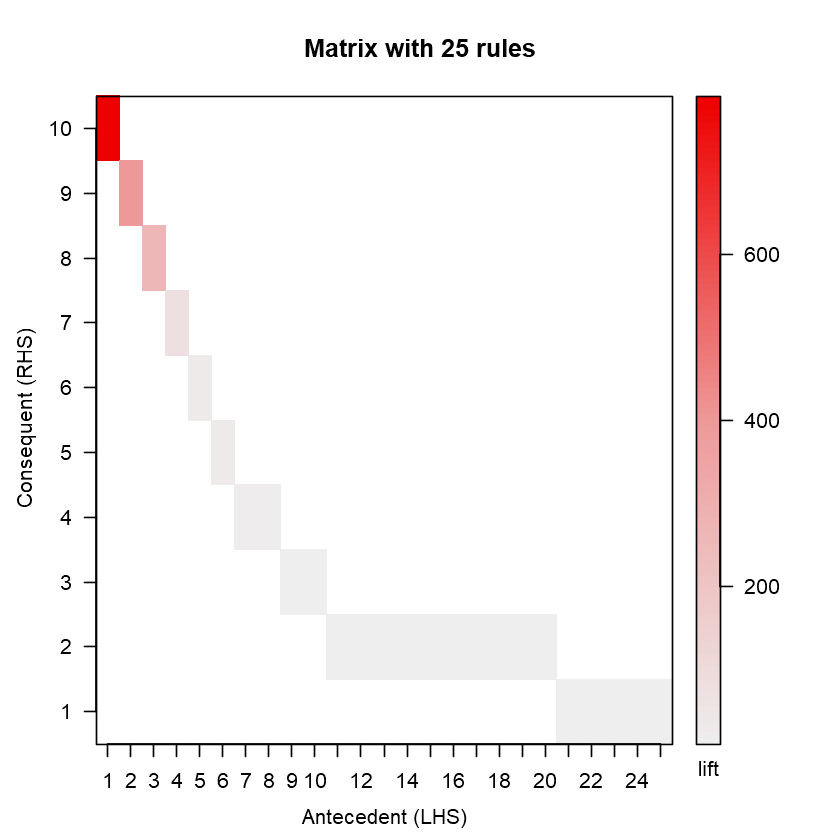

In [177]:
plot(rule_3, method="matrix", measure="lift")

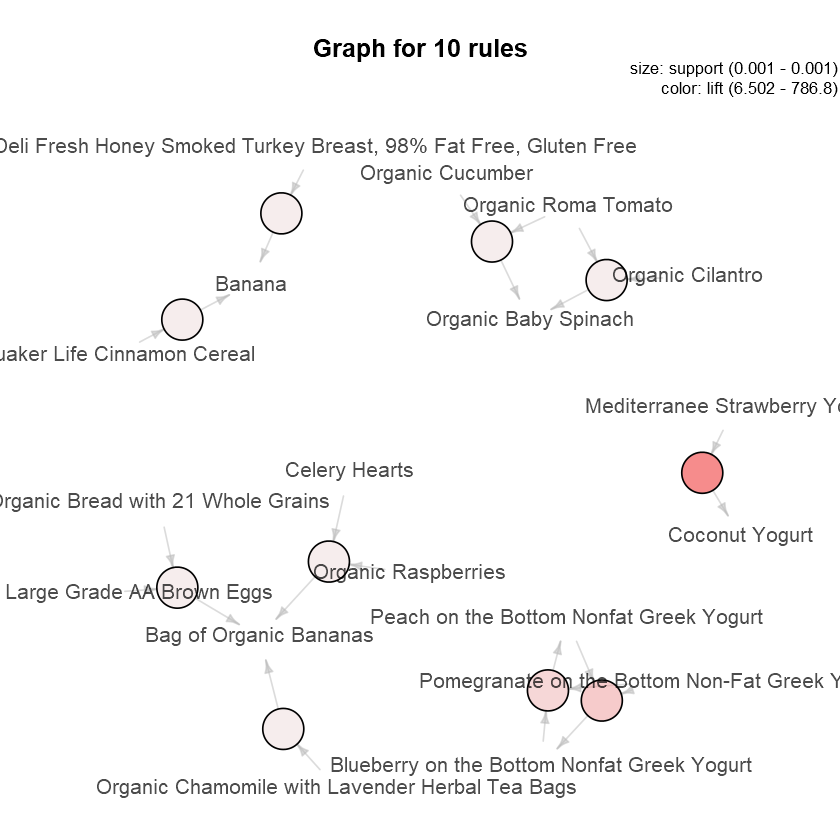

In [189]:
plot(rule_3[1:10],method = 'graph')

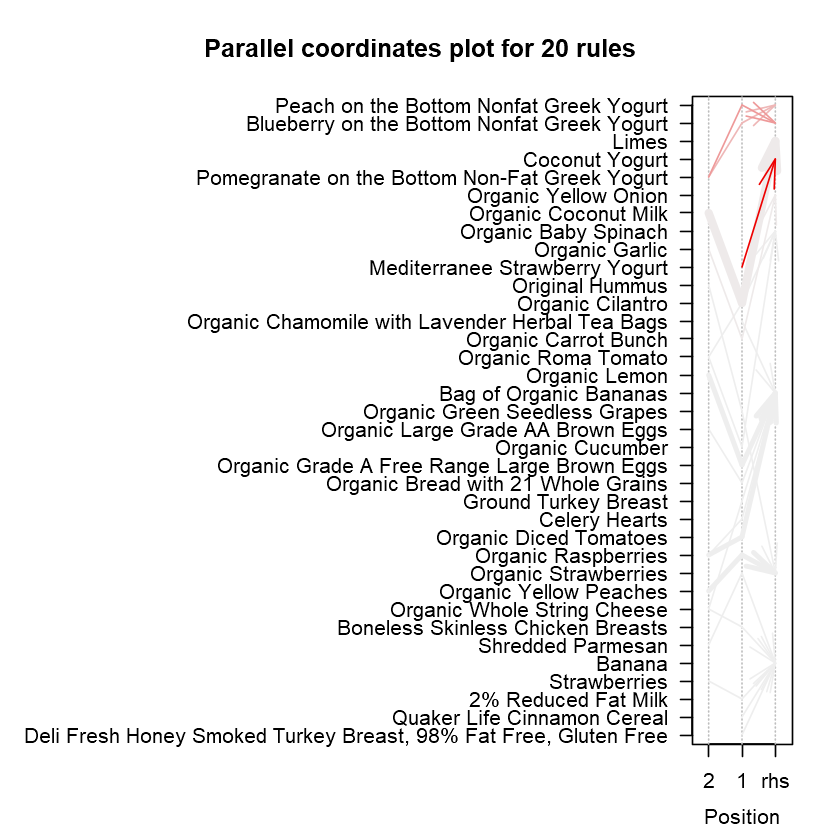

In [192]:
plot(rule_3[1:20], method="paracoord", control=list(reorder=TRUE))

# Saving Association rules

In [194]:
write(rule_3, file = "ecom_rule.csv", sep = ",", quote = TRUE, row.names = FALSE)

In [195]:
getwd()

[1] "C:/Users/ak"